In [1]:
%matplotlib inline

In [2]:
import gc
import pathlib
import sys

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train_filtered.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"
src_dir_path = root_dir_path / "src"

In [5]:
sys.path.append(str(src_dir_path))

In [6]:
from constants import *

In [7]:
train = pd.read_parquet(train_path)

In [8]:
is_train = train["date"] < "2016-01-29"
is_valid = train["date"] >= "2016-01-29"
train, valid = train[is_train], train[is_valid]

In [9]:
del is_train

In [10]:
gc.collect()

0

In [11]:
train.shape

(43375450, 30)

In [12]:
valid.shape

(2652507, 30)

In [13]:
X = train[features]
X_valid = valid[features]
y = train["demand"]
y_valid = valid["demand"]

In [14]:
del train
del valid

In [15]:
gc.collect()

0

In [16]:
model = lgb.LGBMRegressor(importance_type="gain", random_state=0)

In [17]:
model.fit(X, y, categorical_feature=categorical_features, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X, y), (X_valid, y_valid)])

C:\Users\Yu Ohori\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's rmse: 4.13426	training's l2: 17.0921	valid_1's rmse: 3.47527	valid_1's l2: 12.0775
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 3.95197	training's l2: 15.6181	valid_1's rmse: 3.31941	valid_1's l2: 11.0185
[3]	training's rmse: 3.79685	training's l2: 14.4161	valid_1's rmse: 3.18699	valid_1's l2: 10.1569
[4]	training's rmse: 3.66434	training's l2: 13.4274	valid_1's rmse: 3.0729	valid_1's l2: 9.44273
[5]	training's rmse: 3.5525	training's l2: 12.6203	valid_1's rmse: 2.98033	valid_1's l2: 8.88238
[6]	training's rmse: 3.45708	training's l2: 11.9514	valid_1's rmse: 2.89798	valid_1's l2: 8.39826
[7]	training's rmse: 3.3763	training's l2: 11.3994	valid_1's rmse: 2.82955	valid_1's l2: 8.00638
[8]	training's rmse: 3.30787	training's l2: 10.942	valid_1's rmse: 2.77186	valid_1's l2: 7.6832
[9]	training's rmse: 3.25077	training's l2: 10.5675	valid_1's rmse: 2.72512	valid_1's l2: 7.42628
[10]	training's rmse: 3.20184	training's l2: 10.2518	valid_1's

[84]	training's rmse: 2.73095	training's l2: 7.4581	valid_1's rmse: 2.40954	valid_1's l2: 5.80588
Early stopping, best iteration is:
[74]	training's rmse: 2.74933	training's l2: 7.55882	valid_1's rmse: 2.40356	valid_1's l2: 5.77711


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

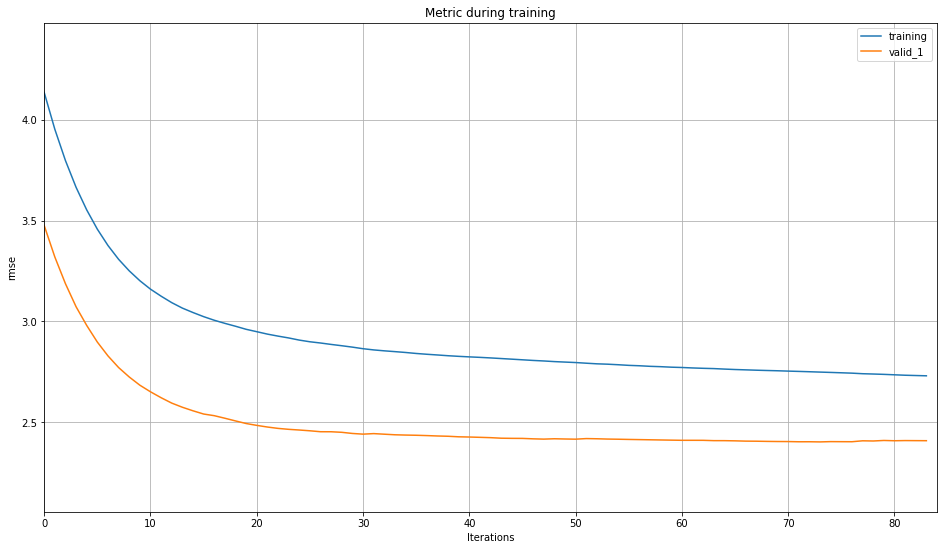

In [18]:
ax = lgb.plot_metric(model, metric="rmse", figsize=(16, 9))

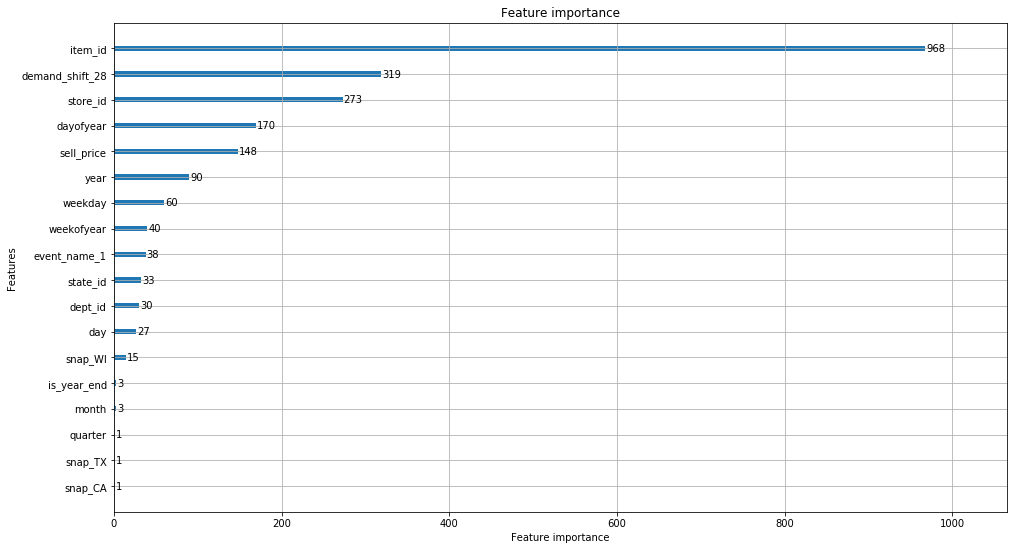

In [19]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [20]:
joblib.dump(model, model_path)

['..\\models\\model.joblib']